### ***Company Data***

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


In [25]:
company = pd.read_csv('/content/Company_Data.csv')

In [26]:
company.shape

(400, 11)

In [27]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [28]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [29]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [30]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [31]:
company['Sales'].mask(company['Sales']<9.32,0, inplace=True); company['Sales'].mask(company['Sales']>9.32, 1, inplace=True)

In [32]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No


In [33]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [34]:
company['Sales'] = company["Sales"].astype('int')

In [35]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [36]:
company['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [37]:
company['ShelveLoc'] = company['ShelveLoc'].map({'Bad' : 0,'Good' : 1,'Medium' : 2 })
company['Urban'] = company['Urban'].map({'Yes':1,'No':0})
company['US'] = company['US'].map({'Yes':1, 'No':0})

In [38]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [39]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [40]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [41]:
preditors = colnames[1:]
target = colnames[0]

In [42]:
print('Target:' ,target,'\npreditors:' ,preditors)

Target: Sales 
preditors: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


In [43]:
X = company[preditors]
Y = company[target]

In [44]:
rf = RandomForestClassifier(n_estimators='warn',
    criterion='gini', oob_score=True)

In [45]:
np.shape(company)

(400, 11)

In [46]:
def filter(x):
    if x<=np.mean(company.Sales):
        return 'Low Sale'
    else:
            return 'High Sale'

In [47]:
company['sales_cat'] = company['Sales'].copy()
company['sales_cat'] = company['sales_cat'].apply(filter)
company.pop('Sales')
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,High Sale
1,111,48,16,260,83,1,65,10,1,1,High Sale
2,113,35,10,269,80,2,59,12,1,1,High Sale
3,117,100,4,466,97,2,55,14,1,1,Low Sale
4,141,64,3,340,128,0,38,13,1,0,Low Sale


In [48]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 
company['sales_cat']= label_encoder.fit_transform(company['sales_cat'])
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [49]:
company.sales_cat.value_counts()

1    298
0    102
Name: sales_cat, dtype: int64

In [50]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  sales_cat    400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [51]:
company.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.745000
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.436407
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,1.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.000000


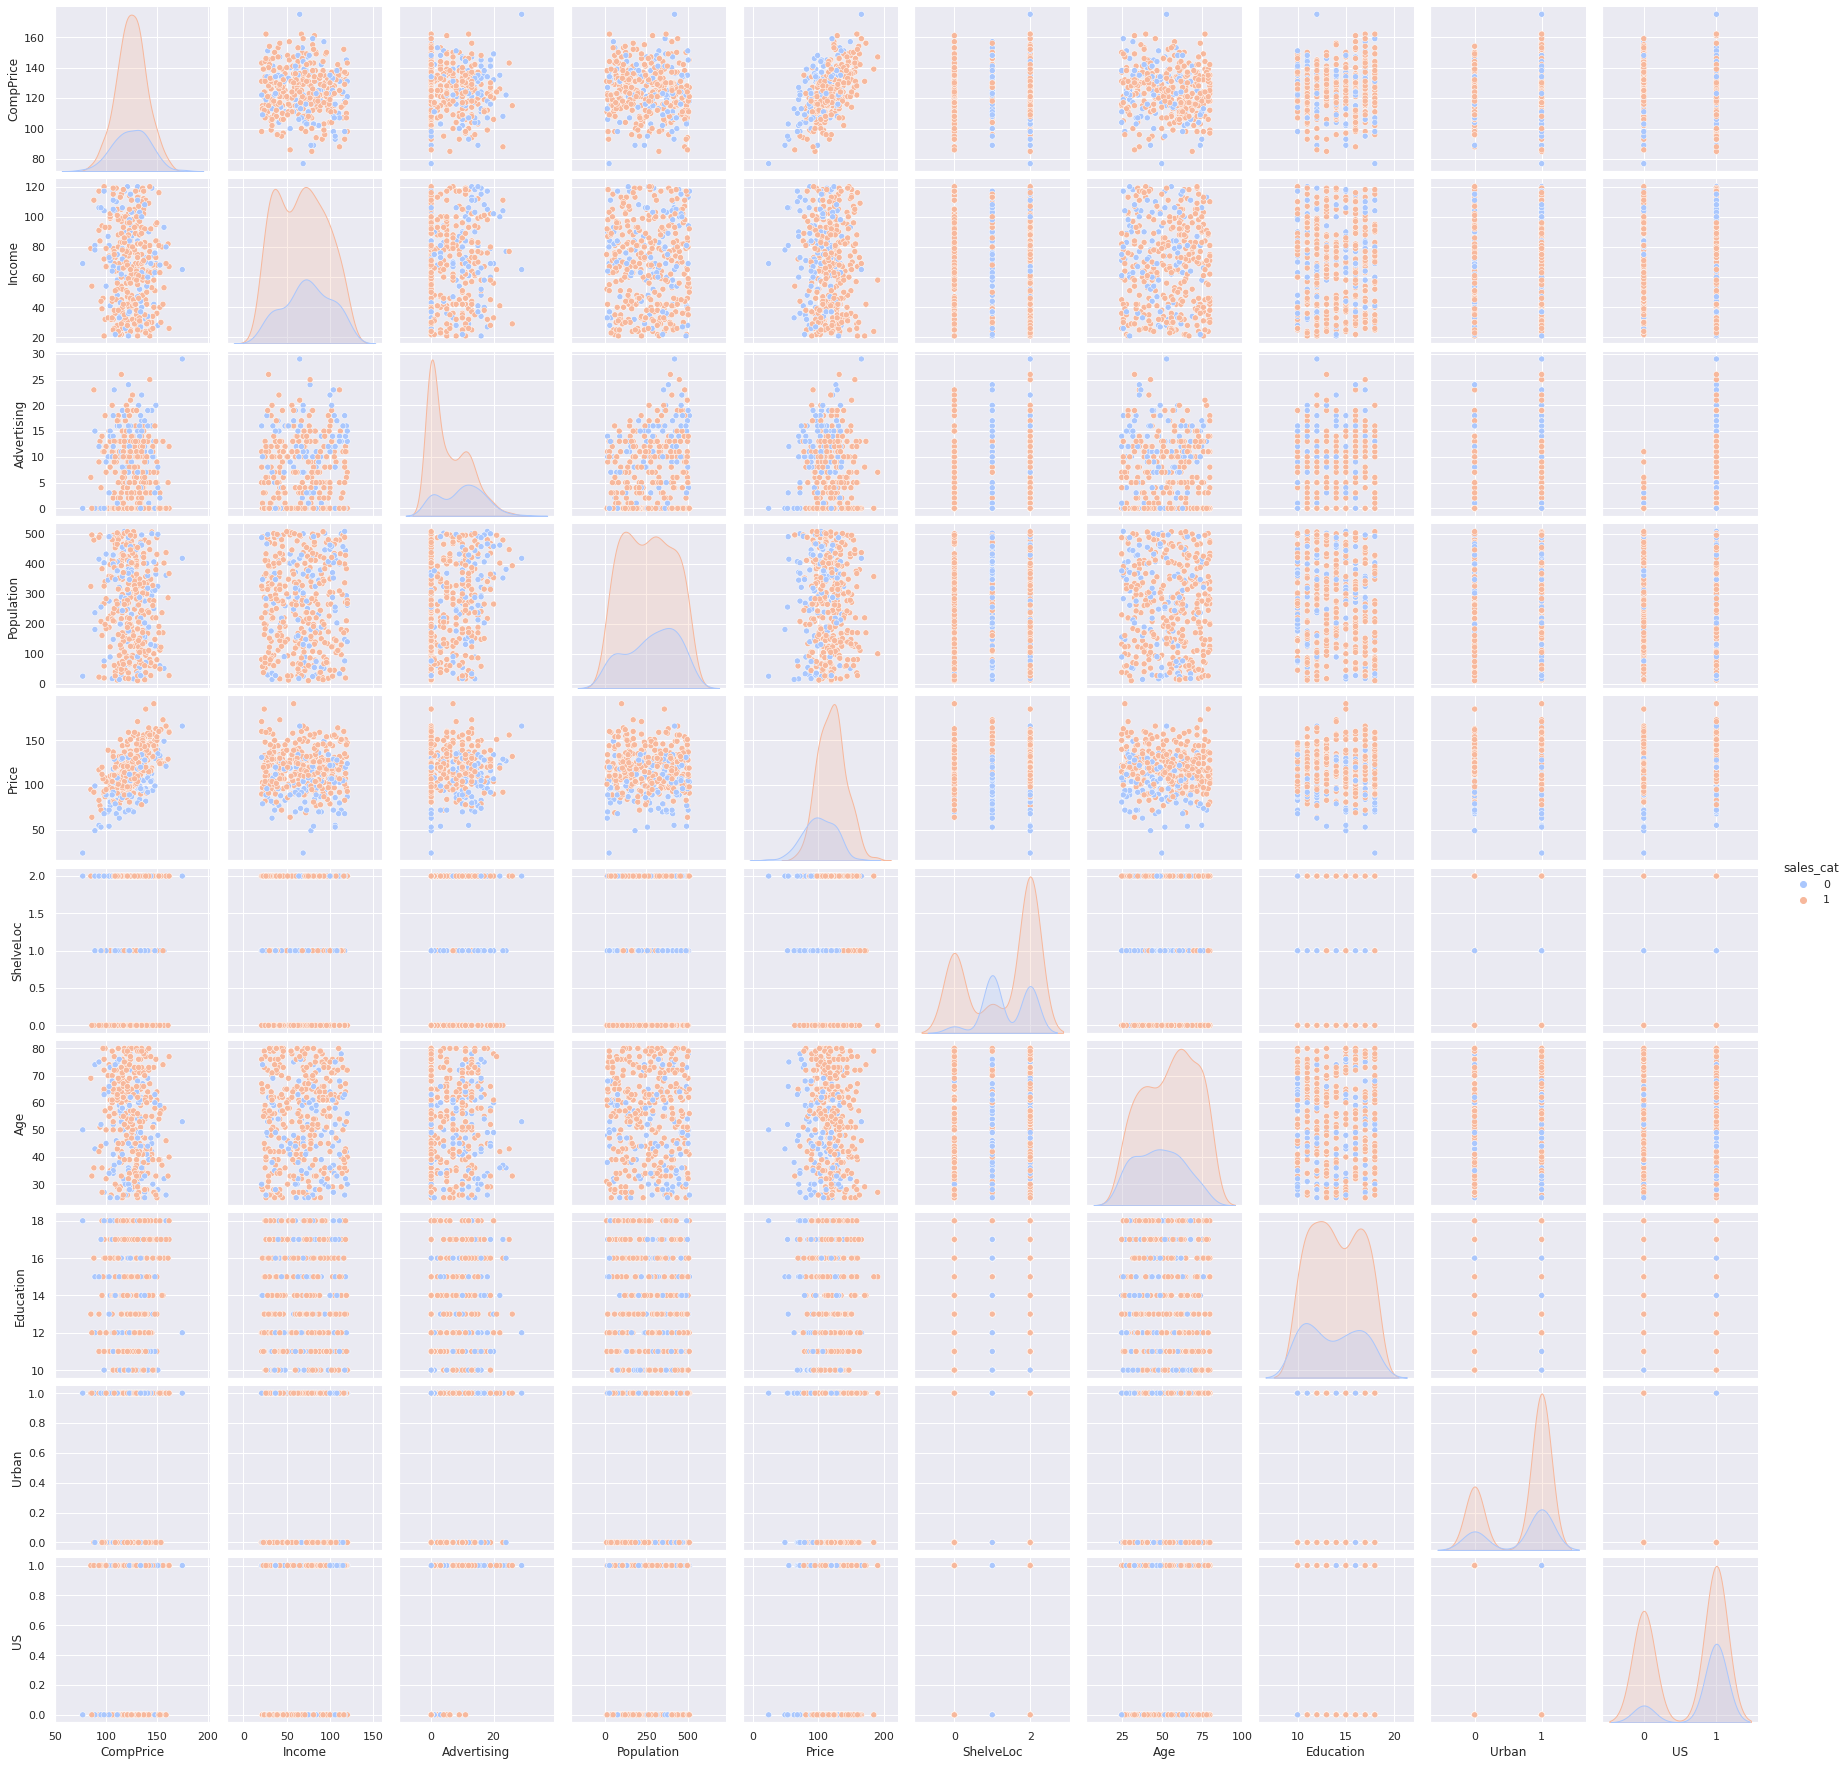

In [52]:
sns.pairplot(company,hue='sales_cat',palette='coolwarm')

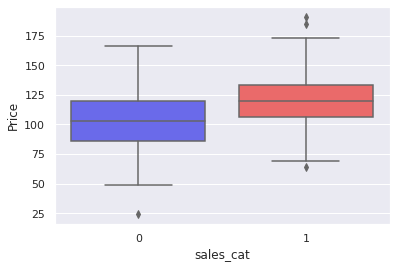

In [53]:
sns.boxplot(x='sales_cat',y='Price',data=company,palette='seismic')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a40366dd0>,
      dtype=object)

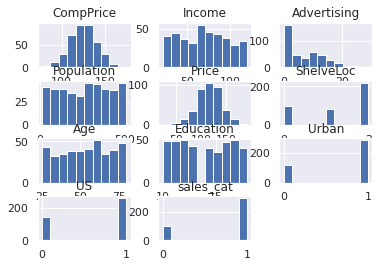

In [54]:
company.hist()

In [55]:
pdata=company.copy()

In [56]:
x=pdata.iloc[:,0:-1]
y=pdata['sales_cat']

In [57]:
y.value_counts()

1    298
0    102
Name: sales_cat, dtype: int64

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [64]:
model =  RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [65]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [66]:
base_pred = model.predict(x_test)

In [67]:
confusion_matrix(y_test,base_pred) 

array([[13, 10],
       [ 5, 52]])

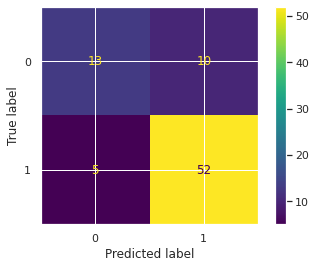

In [68]:
plot_confusion_matrix(model,x_test,y_test)

In [69]:
print(classification_report(y_test,base_pred)) 

              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.84      0.91      0.87        57

    accuracy                           0.81        80
   macro avg       0.78      0.74      0.75        80
weighted avg       0.81      0.81      0.81        80



In [70]:
model.feature_importances_

array([0.08944712, 0.06624999, 0.11562411, 0.08918448, 0.28166701,
       0.11467701, 0.14539732, 0.05469302, 0.01398234, 0.0290776 ])

In [71]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 

,Feature Importance
CompPrice,0.089447
Income,0.066250
Advertising,0.115624
Population,0.089184
Price,0.281667
ShelveLoc,0.114677
Age,0.145397
Education,0.054693
Urban,0.013982
US,0.029078


In [72]:
kfold=KFold(n_splits=5,random_state=7)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8225


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [73]:
model1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=17,max_depth=17)

In [74]:
model=BaggingClassifier(base_estimator=model1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8375000000000001


In [75]:
model=AdaBoostClassifier(base_estimator=model1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8724999999999999


In [76]:
d_train = lgb.Dataset(x_train, label=y_train)

In [77]:
params = {}
params['learning_rate'] = 0.006
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.4
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 17

In [78]:
clf = lgb.train(params, d_train, 100)

In [79]:
y_pred=clf.predict(x_test)

In [80]:
predictions = [round(value) for value in y_pred]

In [81]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7125

In [82]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [84]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [85]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [86]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.75%


In [87]:
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [88]:
accuracy

1.0

## ***Fraud Check***

In [176]:
Fraud = pd.read_csv("/content/Fraud_check.csv")

In [177]:
Fraud.shape

(600, 6)

In [178]:
Fraud.columns

Index(['Undergrad', 'MaritalStatus', 'TaxableIncome', 'CityPopulation',
       'WorkExperience', 'Urban'],
      dtype='object')

In [179]:
Fraud.dtypes

Undergrad         object
MaritalStatus     object
TaxableIncome      int64
CityPopulation     int64
WorkExperience     int64
Urban             object
dtype: object

In [180]:
Fraud.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [181]:
Fraud.describe()

,TaxableIncome,CityPopulation,WorkExperience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [182]:
Fraud.isnull().any().any()

False

In [183]:
Fraud.sample(6)

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
572,YES,Married,39818,148068,13,NO
4,NO,Married,81002,27533,28,NO
447,NO,Married,83061,166606,5,YES
506,NO,Single,23884,111105,8,YES
433,NO,Married,15532,129265,14,YES
152,NO,Single,22054,91889,16,NO


In [184]:
Fraud['TaxableIncome'].value_counts()

59689    2
23884    1
91462    1
39144    1
33092    1
        ..
52891    1
98970    1
24215    1
15532    1
77082    1
Name: TaxableIncome, Length: 599, dtype: int64

In [185]:
Fraud['TaxableIncome'].value_counts(normalize=True)


59689    0.003333
23884    0.001667
91462    0.001667
39144    0.001667
33092    0.001667
           ...   
52891    0.001667
98970    0.001667
24215    0.001667
15532    0.001667
77082    0.001667
Name: TaxableIncome, Length: 599, dtype: float64

In [186]:
Fraud["income"]="<=30000"
Fraud.loc[Fraud["TaxableIncome"]>=30000,"income"]="Good"
Fraud.loc[Fraud["TaxableIncome"]<=30000,"income"]="Risky"

In [187]:
Fraud.drop(["TaxableIncome"],axis=1,inplace=True)

In [188]:
Fraud.rename(columns={"Undergrad":"undergrad","MaritalStatus":"marital","CityPopulation":"population","WorkExperience":"experience","Urban":"urban"},inplace=True)

In [189]:
le=preprocessing.LabelEncoder()
for column_name in Fraud.columns:
    if Fraud[column_name].dtype == object:
        Fraud[column_name] = le.fit_transform(Fraud[column_name])
    else:
        pass

In [190]:
features = Fraud.iloc[:,0:5]
labels = Fraud.iloc[:,5]

In [191]:
colnames = list(Fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

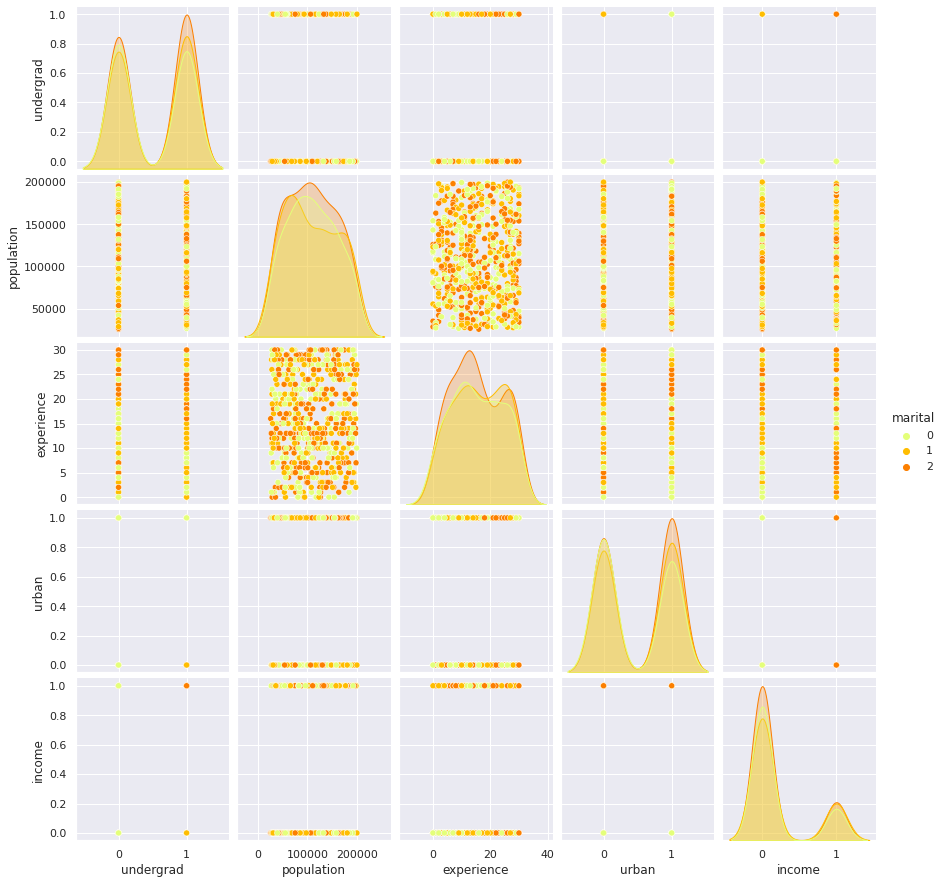

In [192]:
sns.pairplot(Fraud,hue='marital',palette='Wistia')

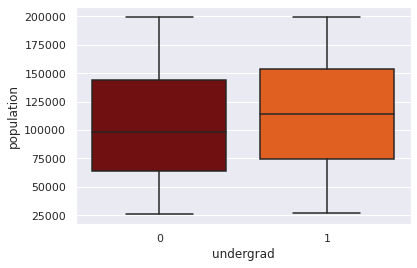

In [139]:
sns.boxplot(x='undergrad',y='population',data=Fraud,palette='gist_heat')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a3cf0a390>,
      dtype=object)

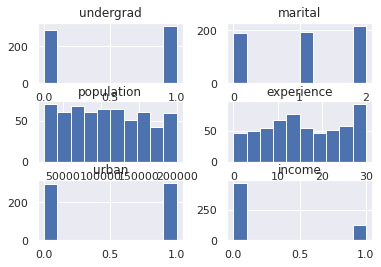

In [140]:
Fraud.hist()

In [141]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [142]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [144]:
model.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1146253106, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=989641350, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_dept

In [145]:
model.classes_

array([0, 1])

In [146]:
model.n_features_

5

In [147]:
model.n_classes_

2

In [148]:
model.n_outputs_

1

In [149]:
model.oob_score_

0.7395833333333334

In [150]:
prediction = model.predict(x_train)

In [167]:
accuracy = accuracy_score(y_train,prediction)
accuracy

0.9854166666666667

In [152]:
np.mean(prediction == y_train)

0.9854166666666667

In [171]:
confusion = confusion_matrix(y_train,prediction)
confusion

array([[381,   0],
       [  7,  92]])

In [172]:
pred_test = model.predict(x_test)
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [168]:
acc_test =accuracy_score(y_test,pred_test)
acc_test

0.7666666666666667

In [156]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [173]:
tree = model.estimators_[5]
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=446258013, splitter='best')

In [174]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [175]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [160]:
graph.write_pdf('fraudrf.pdf')

True

In [161]:
graph.write_png('fraudrf.png')

True

In [193]:
kfold=KFold(n_splits=8,random_state=5)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8475


In [194]:
model1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=15,max_depth=19)

In [195]:
model=BaggingClassifier(base_estimator=model1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8375000000000001


In [196]:
model=AdaBoostClassifier(base_estimator=model1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())



0.8674999999999999


In [197]:
d_train = lgb.Dataset(x_train, label=y_train)

In [198]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [199]:
clf = lgb.train(params, d_train, 100)

In [200]:
y_pred=clf.predict(x_test)

In [201]:
predictions = [round(value) for value in y_pred]

In [202]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7916666666666666

In [203]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [204]:
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [205]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [206]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [207]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.50%


In [208]:
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.88%
